# Анализ оттока клиентов
<br>

**Описание:**
&nbsp;&nbsp;&nbsp;&nbsp;

&nbsp;&nbsp;&nbsp;&nbsp; Задача - проанализировать данные и спрогнозировать отток пользователей в телекоммуникационной компании (выявить людей, которые продлят контракт и которые не продлят). 

Структура отчета: 

[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


# 1. Описание данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

### Структура данных
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

In [3]:
# загрузим данные
telecom_users_df= pd.read_csv('data/telecom_users.csv')

telecom_users_df

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [4]:
# выведем общую информацию о наборе данных

telecom_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [5]:
# проверим наличие пустых значений в колонках
telecom_users_df.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# проверим наличие дублей в поле "CustomerId"

telecom_users_df['customerID'].duplicated().sum()

0

In [7]:
#удалим поле 'unnamed', т.к. нам о нем ничего не известно
telecom_users_df= telecom_users_df.drop(columns= 'Unnamed: 0')

In [8]:
# посчитаем базовые метрики по числовым характеристикам
metrics= ['tenure', 'MonthlyCharges', 'TotalCharges']

# перевести поле во float поле 'TotalCharges'
def convert_strtofloat (p_x):    
    try:
        return float(p_x)
    except ValueError:
        return -1    
    
#convert_strtofloat

telecom_users_df['TotalCharges']= telecom_users_df['TotalCharges'].apply(lambda x: convert_strtofloat (x)) 

stat= pd.DataFrame()
stat['metrics']= metrics

stat['mean']= stat['metrics'].map(telecom_users_df[metrics].mean())
stat['disp']= stat['metrics'].map(telecom_users_df[metrics].std()**2)
stat['mode']= stat['metrics'].map(telecom_users_df[metrics].mode().transpose()[0])
stat['50']= np.percentile(telecom_users_df[metrics], 50, axis=0)
stat['75']= np.percentile(telecom_users_df[metrics], 75, axis=0)
stat['99']= np.percentile(telecom_users_df[metrics], 99, axis=0) 

stat

,metrics,mean,disp,mode,50,75,99
0,tenure,32.468760,6.010534e+02,1.00,29.000,56.0,72.000
1,MonthlyCharges,64.802213,9.068953e+02,20.05,70.400,89.9,114.900
2,TotalCharges,2294.219888,5.171830e+06,-1.00,1408.575,3841.5,8058.595


In [9]:
# расчитаем соотношение клиентов по каждому нечисловому признаку в процентах

metrics= {'gender':'пол клиента (male/female)', 
'SeniorCitizen':'яляется ли клиент пенсионером (1, 0)',
'Partner':'состоит ли клиент в браке (Yes, No)',
'Dependents':'есть ли у клиента иждивенцы (Yes, No)',
'PhoneService':'подключена ли услуга телефонной связи (Yes, No)',
'MultipleLines':'подключены ли несколько телефонных линий (Yes, No, No phone service)',
'InternetService':'интернет-провайдер клиента (DSL, Fiber optic, No)',
'OnlineSecurity':'подключена ли услуга онлайн-безопасности (Yes, No, No internet service)',
'OnlineBackup':'подключена ли услуга online backup (Yes, No, No internet service)',
'DeviceProtection':'есть ли у клиента страховка оборудования (Yes, No, No internet service)',
'TechSupport':'подключена ли услуга технической поддержки (Yes, No, No internet service)',
'StreamingTV':'подключена ли услуга стримингового телевидения (Yes, No, No internet service)',
'StreamingMovies':'подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)',
'Contract':'тип контракта клиента (Month-to-month, One year, Two year)',
'PaperlessBilling':'пользуется ли клиент безбумажным биллингом (Yes, No)',
'PaymentMethod':'метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))',          
'Churn':'произошел ли отток (Yes or No)'}

for key, val in metrics.items():
    print ()
    print ('соотношение клиентов (%) по признаку "{} ({})"'.format(key, val))
    print(telecom_users_df[[key,'customerID']].groupby(key).agg ('count').apply(lambda x: round(100 * x / x.sum(), 2)))
    print ('--------------------------')

#for


соотношение клиентов (%) по признаку "gender (пол клиента (male/female))"
        customerID
gender            
Female       49.05
Male         50.95
--------------------------

соотношение клиентов (%) по признаку "SeniorCitizen (яляется ли клиент пенсионером (1, 0))"
               customerID
SeniorCitizen            
0                   83.86
1                   16.14
--------------------------

соотношение клиентов (%) по признаку "Partner (состоит ли клиент в браке (Yes, No))"
         customerID
Partner            
No            51.49
Yes           48.51
--------------------------

соотношение клиентов (%) по признаку "Dependents (есть ли у клиента иждивенцы (Yes, No))"
            customerID
Dependents            
No               70.08
Yes              29.92
--------------------------

соотношение клиентов (%) по признаку "PhoneService (подключена ли услуга телефонной связи (Yes, No))"
              customerID
PhoneService            
No                  9.86
Yes              

# 2. Исследование зависимостей и формулирование гипотез

In [11]:
# подготовми данные для возможности последующего числового анализа.
# присвоим числовые коды значениям с нечисловыми параметрами

telecom_users_calc_df= telecom_users_df [['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]
#gender – пол клиента (male= 0/female= 1). 

def encode_values (p_source_df, p_target_df, p_columns, p_code_value_dict):
    '''Функция для кодирования значений исходного набора данных
    p_source_df - исходный датафрейм, 
    p_target_df - результирующий датафрейм, 
    p_columns - список колонок, в которых производится кодирование
    p_code_value_dict - словарь вида <значение> : <код>'''
    
    for column in p_columns:
        p_target_df[column]= p_source_df[column].apply(lambda x: p_code_value_dict[x])
    
#encode_values

encode_values (telecom_users_df, telecom_users_calc_df, ['gender'], {'Male': 0, 'Female': 1})

encode_values (telecom_users_df, telecom_users_calc_df, ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'], {'No': 0, 'Yes': 1})

encode_values (telecom_users_df, telecom_users_calc_df, ['MultipleLines'], {'No': 0, 'Yes': 1, 'No phone service': 2})

encode_values (telecom_users_df, telecom_users_calc_df, ['InternetService'], {'No': 0, 'DSL': 1, 'Fiber optic': 2})

encode_values (telecom_users_df, telecom_users_calc_df, ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], {'No': 0, 'Yes': 1, 'No internet service': 2})

encode_values (telecom_users_df, telecom_users_calc_df, ['Contract'], {'Month-to-month': 0, 'One year': 1, 'Two year': 2})

encode_values (telecom_users_df, telecom_users_calc_df, ['PaymentMethod'], {'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})

encode_values (telecom_users_df, telecom_users_calc_df, ['Churn'], {'No': 0, 'Yes': 1})

telecom_users_calc_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Churn
0,0,72,24.10,1734.65,0,1,1,1,0,1,0,2,2,2,2,2,2,2,3,0
1,0,44,88.15,3973.20,1,0,0,1,1,0,2,0,1,1,0,1,0,0,3,0
2,1,38,74.95,2869.85,1,1,0,1,1,1,2,0,0,0,0,0,0,0,2,1
3,0,4,55.90,238.50,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0
4,0,2,53.45,119.50,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,1,95.00,95.00,0,1,0,1,1,0,2,1,0,0,0,1,1,0,0,1
5982,0,23,91.10,2198.30,1,1,1,1,1,1,1,1,1,1,1,1,1,2,3,0
5983,0,12,21.15,306.05,0,1,1,1,1,0,0,2,2,2,2,2,2,0,0,0
5984,1,12,99.45,1200.15,0,0,0,1,1,1,2,0,0,1,0,1,1,0,0,1


In [12]:
# посчитаем корреляцию между параметрами

corr_m = telecom_users_calc_df.corr()
corr_m

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Churn
SeniorCitizen,1.000000,0.005468,0.219387,0.093807,0.007447,0.014867,-0.214233,0.009464,0.155691,0.091462,0.261265,-0.212216,-0.156739,-0.157691,-0.225934,-0.133918,-0.124960,-0.149406,-0.095515,0.150097
tenure,0.005468,1.000000,0.256983,0.827756,-0.003207,0.381976,0.163710,0.010392,0.006569,0.245716,0.040537,0.143400,0.173790,0.176015,0.142835,0.134884,0.143737,0.671551,0.333857,-0.348469
MonthlyCharges,0.219387,0.256983,1.000000,0.656762,0.014286,0.104006,-0.115803,0.251029,0.355816,0.144321,0.903960,-0.614017,-0.532818,-0.510517,-0.592467,-0.420044,-0.420433,-0.068429,-0.072678,0.186753
TotalCharges,0.093807,0.827756,0.656762,1.000000,0.003664,0.321348,0.062690,0.117165,0.162804,0.251203,0.433098,-0.152308,-0.088008,-0.079680,-0.140370,-0.076602,-0.068908,0.449088,0.217647,-0.196389
gender,0.007447,-0.003207,0.014286,0.003664,1.000000,0.007791,-0.009083,0.004913,0.013990,-0.003814,0.009764,0.007302,0.006236,-0.002295,0.000675,0.000677,0.000158,0.001843,0.007894,0.009548
Partner,0.014867,0.381976,0.104006,0.321348,0.007791,1.000000,0.449029,0.024926,-0.018037,0.089719,0.002520,0.089145,0.094064,0.095521,0.073845,0.085361,0.079899,0.300549,0.141066,-0.146840
Dependents,-0.214233,0.163710,-0.115803,0.062690,-0.009083,0.449029,1.000000,-0.000579,-0.112405,-0.016324,-0.183310,0.196531,0.165490,0.157299,0.186881,0.142865,0.130399,0.246163,0.135491,-0.160204
PhoneService,0.009464,0.010392,0.251029,0.117165,0.004913,0.024926,-0.000579,1.000000,0.021340,-0.692826,0.094904,0.128333,0.153403,0.138988,0.127911,0.172608,0.168157,0.005267,-0.008743,0.009421
PaperlessBilling,0.155691,0.006569,0.355816,0.162804,0.013990,-0.018037,-0.112405,0.021340,1.000000,0.107877,0.381487,-0.331098,-0.265764,-0.276992,-0.312717,-0.204408,-0.214167,-0.183335,-0.106746,0.188996
MultipleLines,0.091462,0.245716,0.144321,0.251203,-0.003814,0.089719,-0.016324,-0.692826,0.107877,1.000000,0.175167,-0.235197,-0.209741,-0.199450,-0.234122,-0.205433,-0.196879,0.078568,0.034633,0.018793


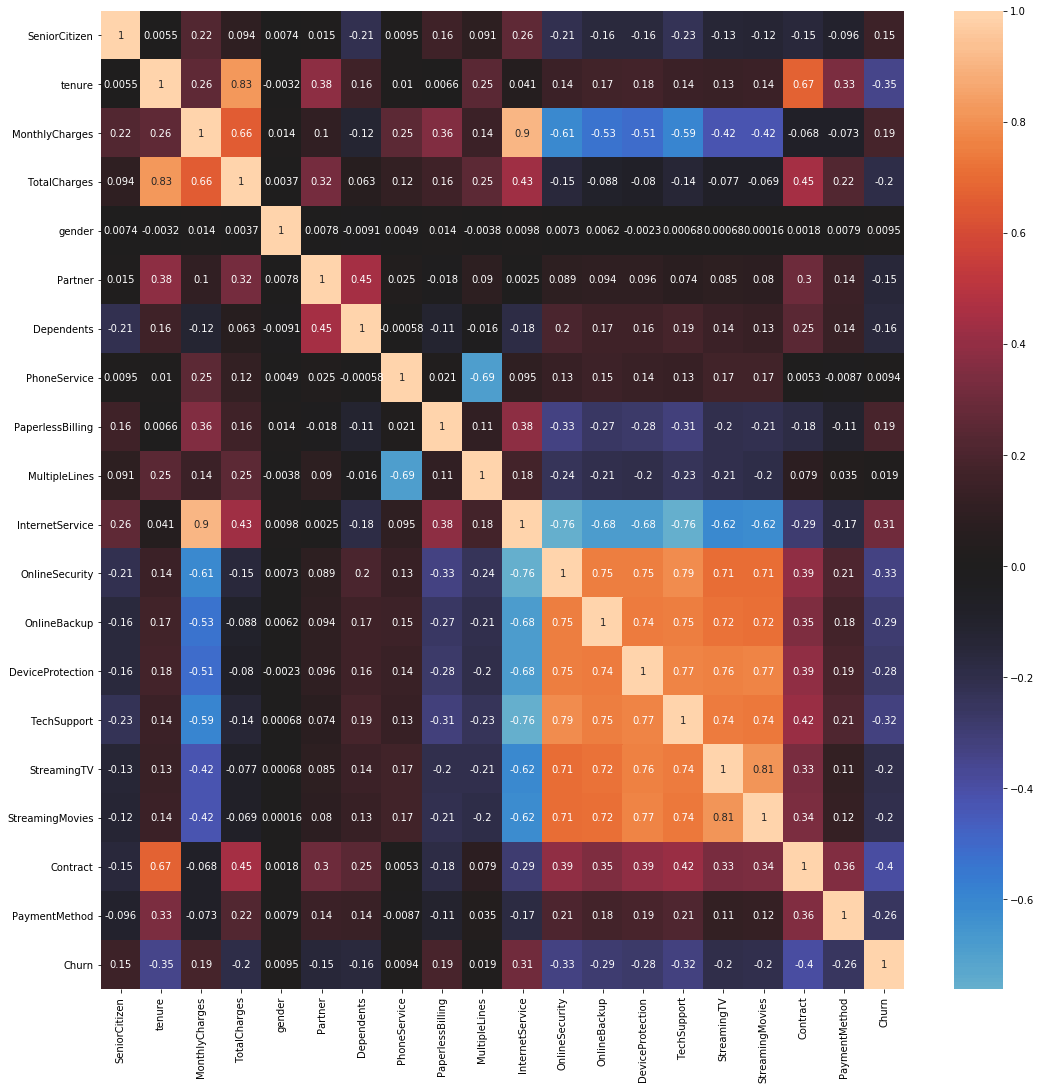

In [18]:
# визуализируем корреляцию между параметрами

plt.figure(figsize=(18,18))
sns.heatmap(corr_m, center=0, annot=True)

plt.show()

In [19]:
# выведем параметры, между которыми есть сильная связь 

add_rows= {}
row_index= index= 0
for row in corr_m.iterrows():
    j= row_index + 1
    while j< len(corr_m.columns):
        
        if -0.5< row[1][j] < 0.5:
            j= j + 1
            continue
        
        add_rows[index]={'param1':row[0]}       
        add_rows[index]['param2']= corr_m.columns[j]
        add_rows[index]['corr_value']= round(row[1][j], 4)
        
        qual_charect= ''
        if row[1][j] >= 0.9:
            qual_charect= 'Весьма высокая'
        
        elif 0.7 <= row[1][j] < 0.9:
            qual_charect= 'Высокая'
        
        elif 0.5 <= row[1][j] < 0.7:
            qual_charect= 'Заметная'
            
        elif 0.3 <= row[1][j] < 0.5:
            qual_charect= 'Умеренная'
            
        elif 0.1 <= row[1][j] < 0.3:
            qual_charect= 'Слабая'
            
        elif -0.1 < row[1][j] < 0.1:
            qual_charect= 'Отсутствует'
            
        elif -0.3 < row[1][j] <= -0.1:
            qual_charect= 'Слабая обратная'
            
        elif -0.5 < row[1][j] <= -0.3:
            qual_charect= 'Умеренная обратная'
            
        elif -0.7 < row[1][j] <= -0.5:
            qual_charect= 'Заметная обратная'
            
        elif -0.9 < row[1][j] <= -0.7:
            qual_charect= 'Высокая обратная'
            
        elif row[1][j] <= -0.9:
            qual_charect= 'Весьма высокая обратная'
            
        
        add_rows[index]['qual_charect']= qual_charect
        
        j= j + 1
        index= index + 1
    #while
          
    row_index = row_index + 1
# for

df= pd.DataFrame.from_dict(add_rows, "index").sort_values('corr_value', ascending= False)

df

,param1,param2,corr_value,qual_charect
3,MonthlyCharges,InternetService,0.9040,Весьма высокая
0,tenure,TotalCharges,0.8278,Высокая
29,StreamingTV,StreamingMovies,0.8090,Высокая
17,OnlineSecurity,TechSupport,0.7903,Высокая
26,DeviceProtection,StreamingMovies,0.7692,Высокая
24,DeviceProtection,TechSupport,0.7680,Высокая
25,DeviceProtection,StreamingTV,0.7617,Высокая
16,OnlineSecurity,DeviceProtection,0.7517,Высокая
15,OnlineSecurity,OnlineBackup,0.7512,Высокая
21,OnlineBackup,TechSupport,0.7508,Высокая


### Гипотезы

Для прогнозирования оттока необходимо провести исследования, которые помогут выявить влияние характеристик на отток:
1. Связан ли отток (Churn) с количеством услуг, подключенных у пользователя, а так как количество услуг в прямую влияет на затраты (что мы увидели в пункте, где вывели зависимость между параметрами), то зависит ли отток от затрат.
2. Связан ли отток с тем сколько клиент пользуется услугами компании, т.к. чем дольше клиент пользуется услугами компании, тем меньше вероятность, что он может ее покинуть.
3. Связан ли отток с типом контракта, т.к. клиенты с длительными типами контрактов должны быть более лояльны к компании.
4. Связан ли отток со способом оплаты, т.к. клиенты, которые используют автоматическую оплату могут быть более лояльными к компании.
5. Связан ли отток типом подключения к интернету. Клиенты, которые используют проводное подключение (Fiber optic), которое требует выполнения работ по проводке кабеля, могут быть более лояльным к компании, чем те кто используют dsl модемы, которые можно легко заменить.
6. Связан ли отток с тем, что клиент пенсионер. Пенсионеры более консервативны, поэтому должны быть более лояльны к компании.
7. Связан ли отток с наличием партнера (брака), т.к. семейные люди могут быть более консервативными, при выборе компании, и соответственно более лояльны.
8. Связан ли отток с наличием иждивенцев. Наличие иждивенцев может говорить о том что семья состоит от 2-х и более членов, что может показать на сколько ориентированы/выгодны услуги компании на подключения с многими пользователями.
9. Связан ли отток с полом клиента. Мужчины и женщины могут по-разному относиться к качеству и стоимости услуг.
10. Связан ли отток с использование телефонной связи. Клиенты, которые пользуются телефонной связью могут быть более лояльными, т.к. пришли в компанию давно за данной базовой услугой. 
11. Связан ли отток с услугой электронных (безбумажных счетов). Клиенты которые пользуются бумажными счетами, скорее всего коммерческие организации, которые давно пользуются услугами компании и могут быть более лояльны к ней.

,MonthlyCharges
Churn,
No,61.424506
Yes,74.164871


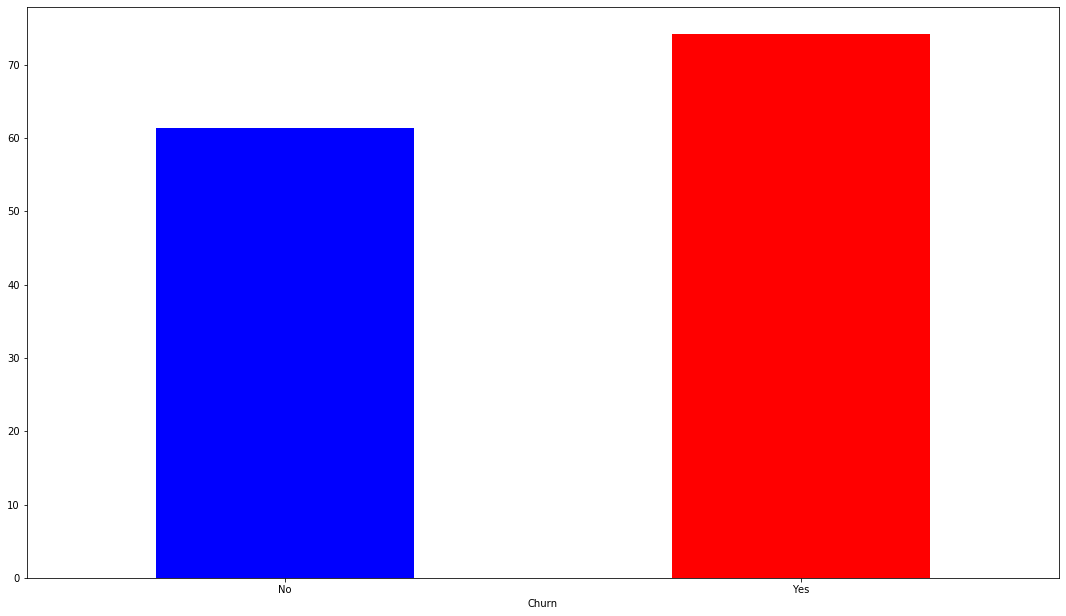

In [20]:
#1.1 Связан ли отток (Churn) с количеством затрат

#Сравним средние месячные затраты у клиентов, которые остались и которые ушли
df= telecom_users_df[['Churn', 'MonthlyCharges']].groupby('Churn').agg('mean')

ax= df.plot.bar(y='MonthlyCharges', rot=0, figsize=(18.5, 10.5), color= ['b','r'], legend= False)

df

,TotalCharges
Churn,
No,2562.454240
Yes,1550.701985


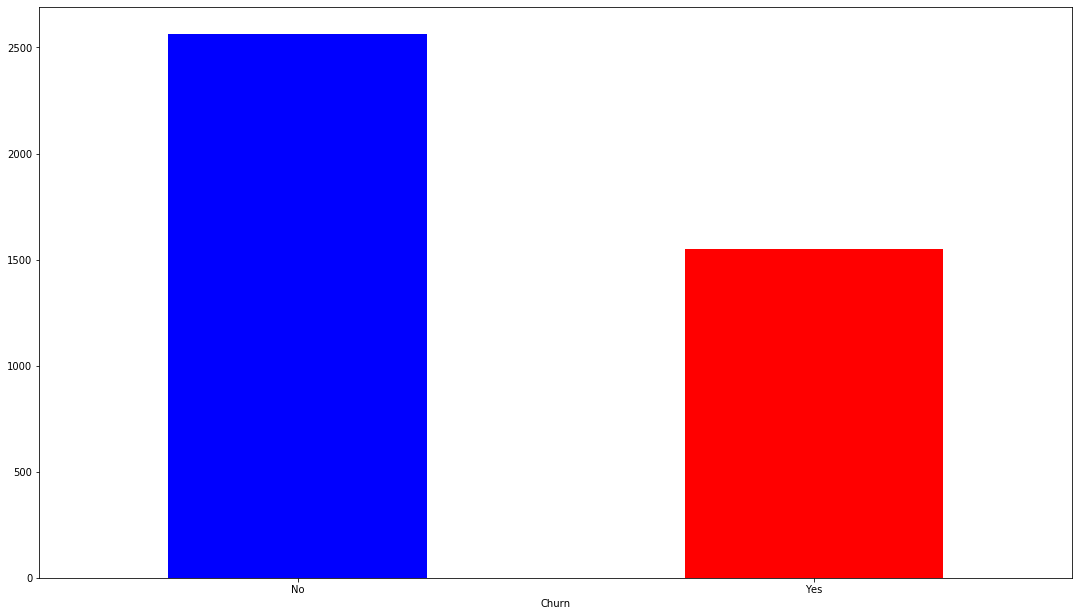

In [21]:
#1.2 Связан ли отток (Churn) с количеством затрат

#Сравним средние суммарные затраты у клиентов, которые остались и которые ушли
df= telecom_users_df[['Churn', 'TotalCharges']].groupby('Churn').agg('mean')

ax= df.plot.bar(y='TotalCharges', rot=0, figsize=(18.5, 10.5), color= ['b','r'], legend= False)

df

,tenure
Churn,
No,37.599682
Yes,18.246377


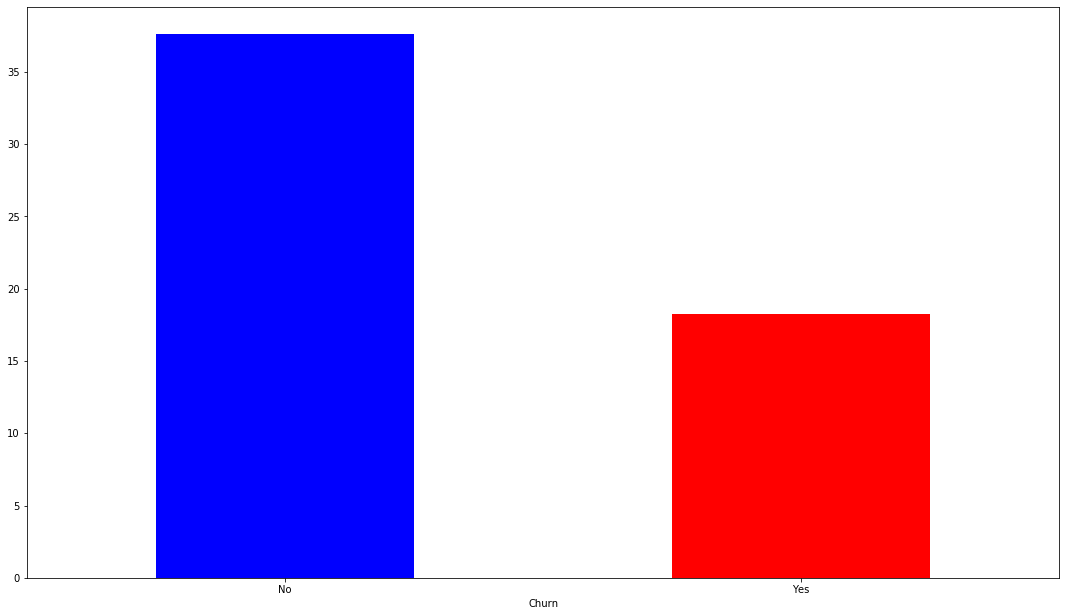

In [22]:
# 2. Связан ли отток с тем сколько клиент пользуется услугами компании

#Сравним среднее суммарное время пользования услугами у клиентов, которые остались и которые ушли
df= telecom_users_df[['Churn', 'tenure']].groupby('Churn').agg('mean')

ax= df.plot.bar(y='tenure', rot=0, figsize=(18.5, 10.5), color= ['b','r'], legend= False)

df

,Churn
Contract,
0,1398
1,148
2,41


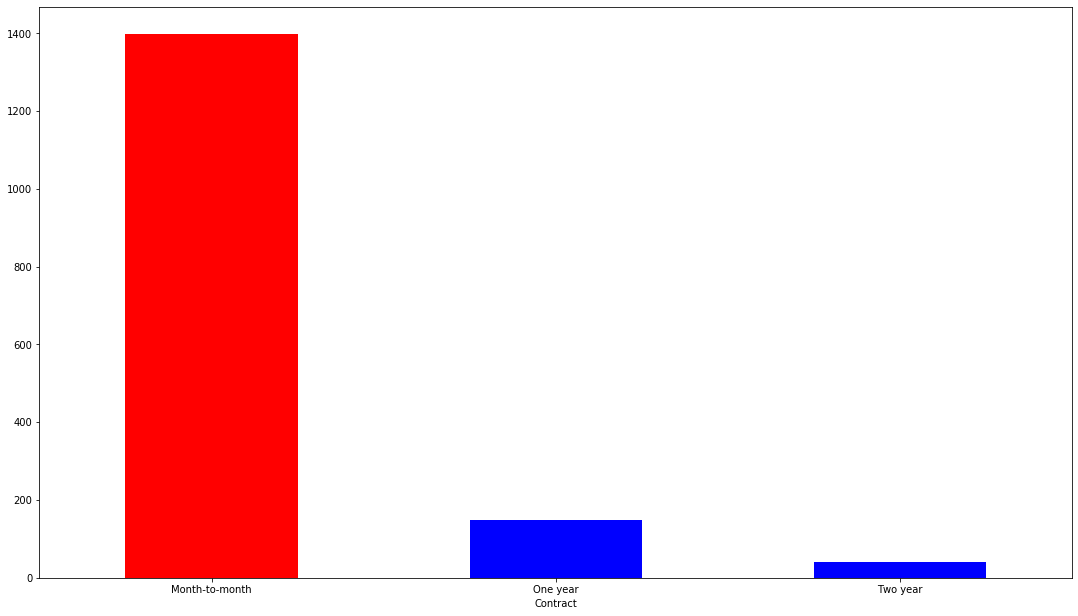

In [23]:
#3. Связан ли отток с типом контракта

#Посчитаем количество ушедших клиентов по каждому типу контракта
#'Month-to-month': 0, 
#'One year': 1, 
#'Two year': 2
df= telecom_users_calc_df[['Churn', 'Contract']].groupby('Contract').agg('sum')

ax= df.plot.bar(y='Churn', rot=0, figsize=(18.5, 10.5), color= ['r','b', 'b'], legend= False)
ax.set_xticklabels(['Month-to-month', 'One year', 'Two year'])

df

,Churn
PaymentMethod,
0,902
1,263
2,224
3,198


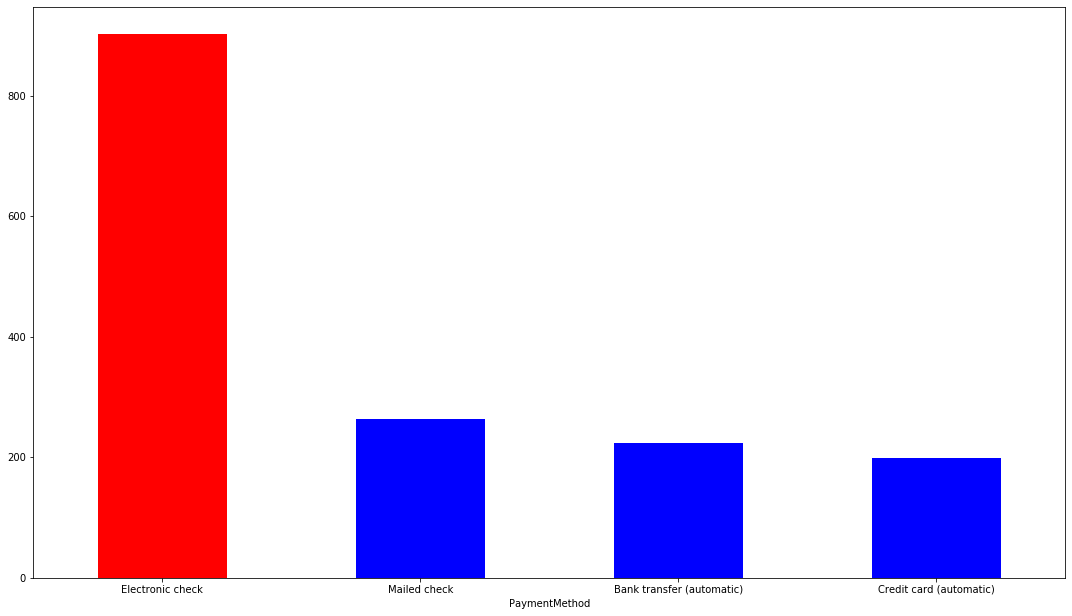

In [24]:
#4. Связан ли отток со способом оплаты

#Посчитаем количество ушедших клиентов по каждому типу оплаты:
#'Electronic check': 0, 
#'Mailed check': 1, 
#'Bank transfer (automatic)': 2, 
#'Credit card (automatic)': 3

df= telecom_users_calc_df[['Churn', 'PaymentMethod']].groupby('PaymentMethod').agg('sum')

ax= df.plot.bar(y='Churn', rot=0, figsize=(18.5, 10.5), color= ['r', 'b','b', 'b'], legend= False)
ax.set_xticklabels(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'])

df

,Churn
InternetService,
0,99
1,397
2,1091


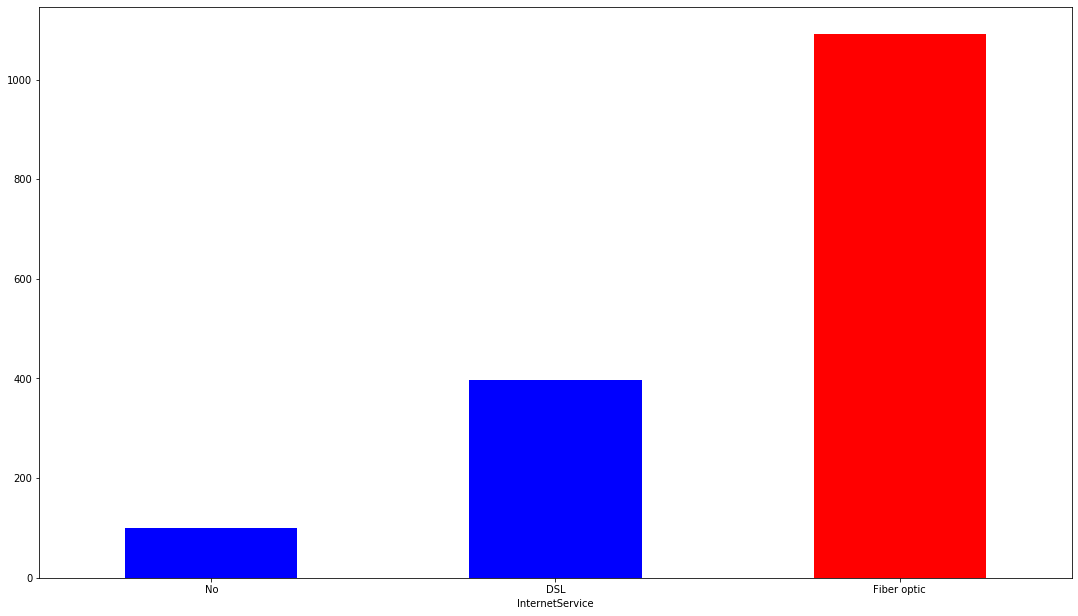

In [26]:
#5. Связан ли отток типом подключения к интернету

#Посчитаем количество ушедших клиентов по каждому типу подключения к Интернету:
#'No': 0
#'DSL': 1, 
#'Fiber optic': 2

df= telecom_users_calc_df[['Churn', 'InternetService']].groupby('InternetService').agg('sum')

ax= df.plot.bar(y='Churn', rot=0, figsize=(18.5, 10.5), color= ['b', 'b', 'r'], legend= False)
ax.set_xticklabels(['No', 'DSL', 'Fiber optic'])

df

,SeniorCitizen
Churn,
No,564
Yes,402


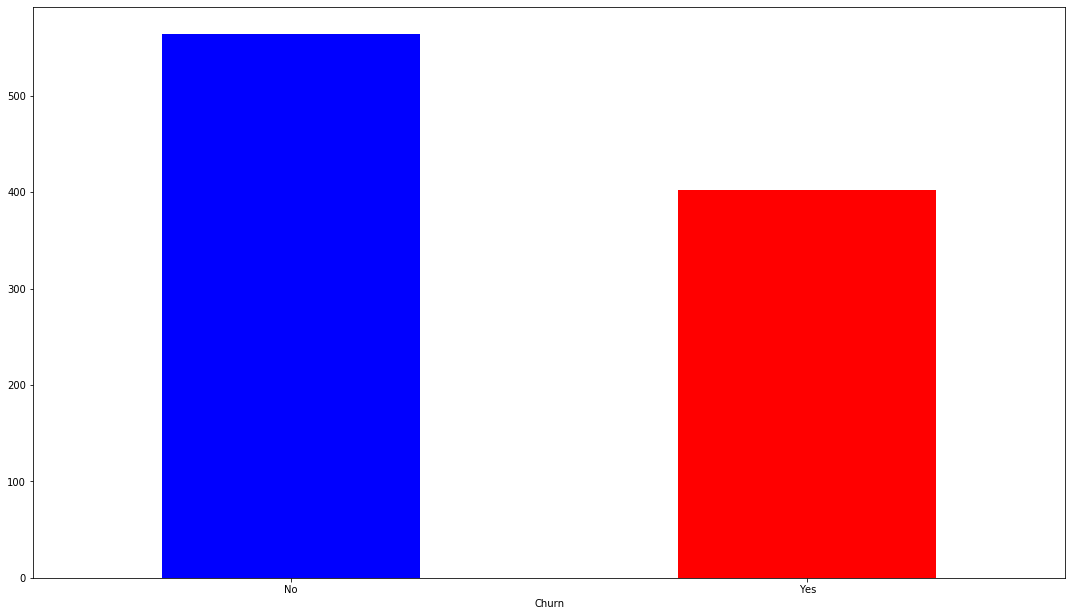

In [27]:
#6. Связан ли отток с тем, что клиент пенсионер.

#Посчитаем количество ушедших и оставшихся пенсионеров:
df= telecom_users_df[['Churn', 'SeniorCitizen']].groupby('Churn').agg('sum')

ax= df.plot.bar(y='SeniorCitizen', rot=0, figsize=(18.5, 10.5), color= ['b','r'], legend= False)
ax.set_xticklabels(['No', 'Yes'])

df

,Churn
Partner,
0,1011
1,576


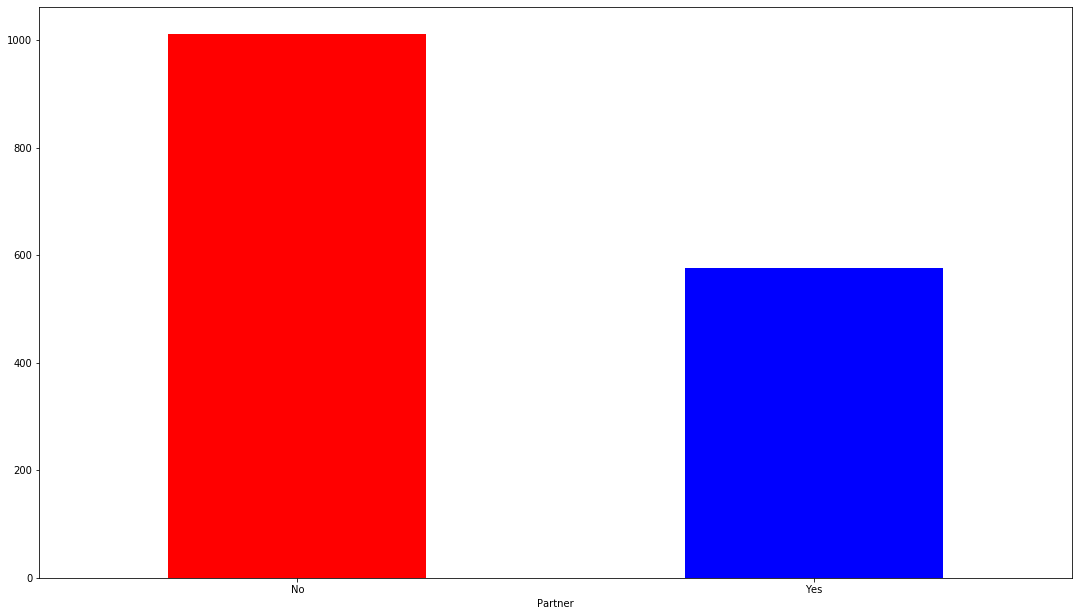

In [28]:
# 7. Связан ли отток с наличием партнера (брака)

#Посчитаем количество ушедших клиентов среди людей в браке (1) и холостых (0):
df= telecom_users_calc_df[['Churn', 'Partner']].groupby('Partner').agg('sum')

ax= df.plot.bar(y='Churn', rot=0, figsize=(18.5, 10.5), color= ['r','b'], legend= False)
ax.set_xticklabels(['No', 'Yes'])

df

,Churn
Dependents,
0,1306
1,281


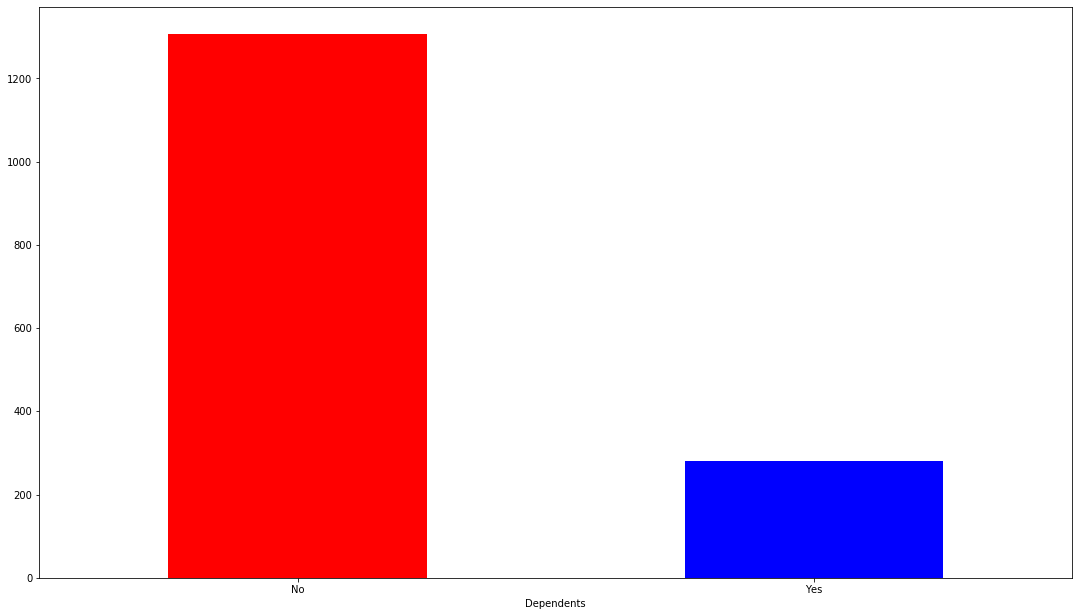

In [29]:
# 8. Связан ли отток с наличием иждевенцев

#Посчитаем количество ушедших клиентов среди людей с иждевенцами(0) и без (1):
df= telecom_users_calc_df[['Churn', 'Dependents']].groupby('Dependents').agg('sum')

ax= df.plot.bar(y='Churn', rot=0, figsize=(18.5, 10.5), color= ['r','b'], legend= False)
ax.set_xticklabels(['No', 'Yes'])

df

,Churn
gender,
0,796
1,791


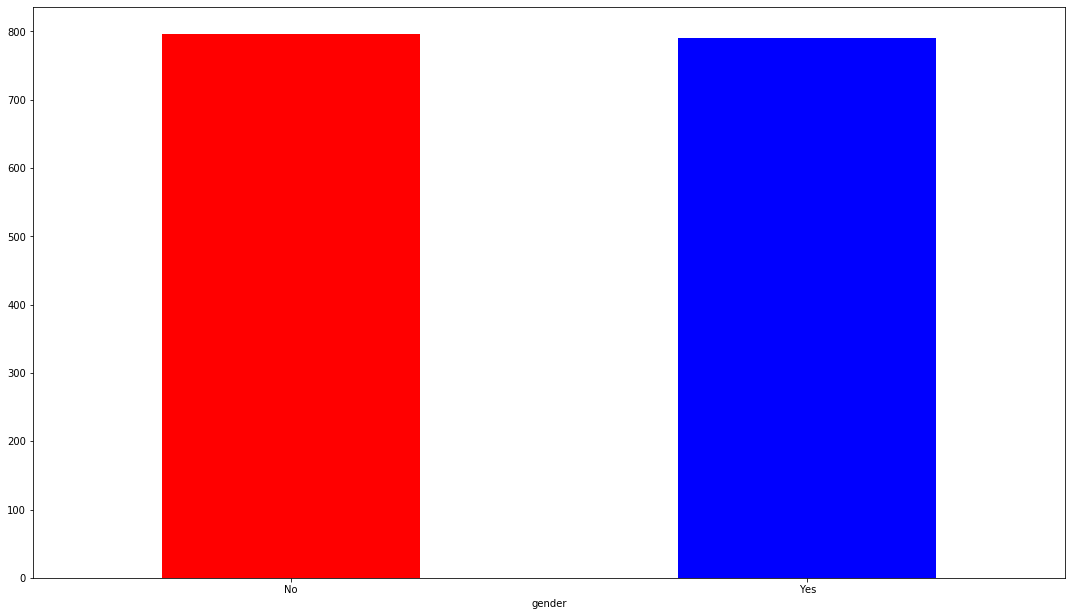

In [30]:
#9. Связан ли отток с полом клиента.

#Посчитаем количество ушедших клиентов среди мужчин(0) и женщин (1):
df= telecom_users_calc_df[['Churn', 'gender']].groupby('gender').agg('sum')

ax= df.plot.bar(y='Churn', rot=0, figsize=(18.5, 10.5), color= ['r','b'], legend= False)
ax.set_xticklabels(['No', 'Yes'])

df

,Churn
PhoneService,
0,149
1,1438


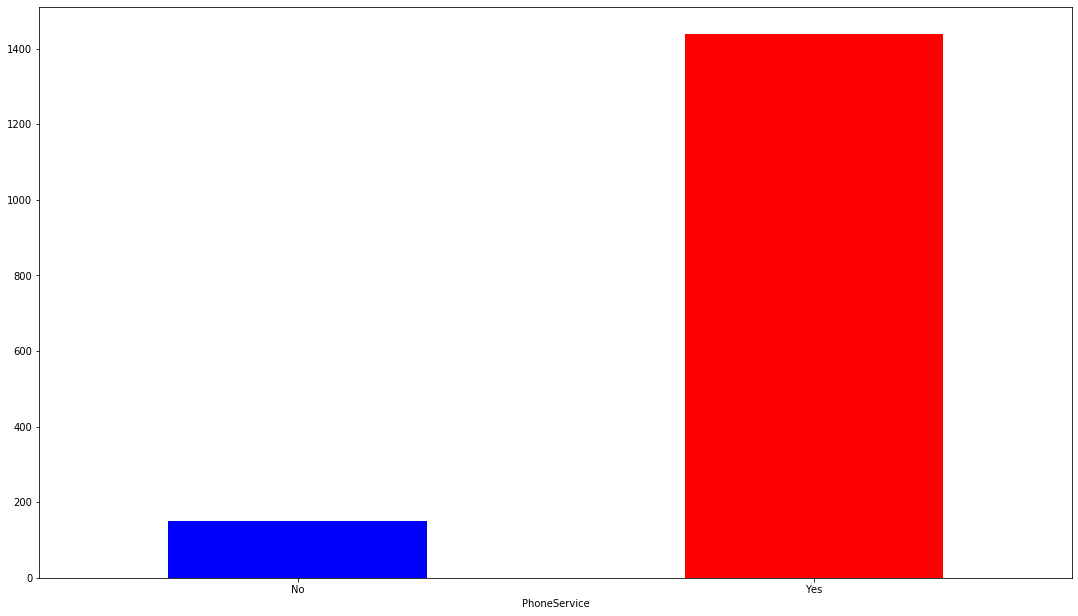

In [31]:
#10. Связан ли отток с услугой телефонной связи.

#Посчитаем количество ушедших клиентов среди пользователей телефонной связи:
df= telecom_users_calc_df[['Churn', 'PhoneService']].groupby('PhoneService').agg('sum')

ax= df.plot.bar(y='Churn', rot=0, figsize=(18.5, 10.5), color= ['b','r'], legend= False)
ax.set_xticklabels(['No', 'Yes'])

df

,Churn
PaperlessBilling,
0,406
1,1181


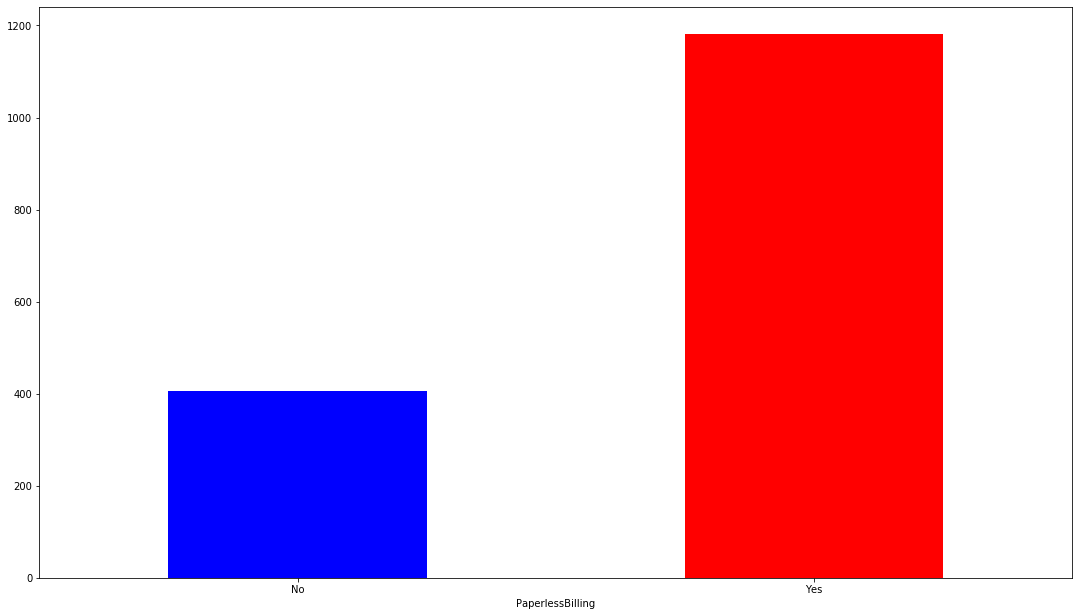

In [32]:
#11. Связан ли отток с услугой электронных (безбумажных счетов).

#Посчитаем количество ушедших клиентов среди пользователей услуги безбумажных счетов:
df= telecom_users_calc_df[['Churn', 'PaperlessBilling']].groupby('PaperlessBilling').agg('sum')

ax= df.plot.bar(y='Churn', rot=0, figsize=(18.5, 10.5), color= ['b','r'], legend= False)
ax.set_xticklabels(['No', 'Yes'])

df

### Итоги по п. 2

В результате проведенного анализа данных были выявлены связи между параметрами:
 * Была установлена высокая связь между интернет услугами (MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies). 
 * Заметная связь между Tenue и Contract.
 * Заметная обратная связь между параметрами PhoneService и MultipleLines
 * Также была установлена высокая связь между месячными затратами клиента и услугой предоставления интернета (InternetService).

Были проверены следующие гипотезы:
 * Связан ли отток с затратами клиента — мы видим, что средний месячный расход у клиентов, попавших в отток, выше, чем у клиентов, которые остались в компании, но при этом суммарные расходы меньше, что логично, т. к. такие клиенты меньше пользовались услугами компании, что будет видно дальше.
 * Связан ли отток с тем сколько клиент пользуется услугами компании — здесь мы видим, что ушедшие клиенты в среднем в 2 раза меньше пользовались услугами компании, что говорит о том, что клиенты, которые пользуются услугами компании в среднем больше 18 мес, более лояльны к компании.
 * Связан ли отток с типом контракта — мы видим очевидную зависимость, что клиенты с помесячными контрактами почти в 10 раз чаще отказываются от услуг компании.
 * Связан ли отток со способом оплаты — мы видим, что среди клиентов, которые используют «Electronic check» для оплаты, в 3-4 раза больше покинувших компанию, чем среди клиентов, использующих другие способы оплаты.
 * Связан ли отток с типом подключения к интернету — мы видим, что в 3 раза больше клиентов отказавшихся от услуг компании, которые используют оптоволоконную связь для подключения к интернету, чем среди тех, которые использую DSL- модемы.
 * Связан ли отток с тем, что клиент пенсионер — мы видим, что больше половины пенсионеров являются лояльными клиентами, но разница не очень большая, по этому нельзя считать данный фактор определяющим.
 * Связан ли отток с наличием партнера (брака) — мы видим, что семейные rkbtyns гораздо более лояльны, чем одинокие.
 * Связан ли отток с наличием иждивенцев — мы видим, что клиенты без иждивенцев, гораздо чаще отказываются от услуг компании.
 * Связан ли отток с полом клиента — мы видим, что пол не влияет на лояльность клиента, т. к. среди покинувших компанию почти одинаковое количество мужчин и женщин.
 * Связан ли отток с использование телефонной связи — мы видим, что клиенты без телефонной связи реже перестают пользоваться услугами компании. Но это может быть связно также с тем, что клиентов без телефонной связи заметно меньше, чем клиентов с телефонной связью.
 * Связан ли отток с услугой электронных (безбумажных счетов) — мы видим, что среди пользователей этой услуги, большее количество клиентов покинуло компанию.


Учитывая вышеописанные результаты, в качестве параметров, которые наиболее влияют на отток клиентов можно выделить следующие: **Partner, Dependents, tenure, PhoneService, Contract, PaymentMethod, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges.**

# 3. Построение моделей для прогнозирования оттока

Для получения лучшего результата возьмем несколько моделей и объединим их вместе.

Т.к. мы решаем задачу классификации, в которой у нас есть "правильные ответы", то оптимально будет выбрать следующие модели:
 * **RandomForestClassifier** - это не очень быстрый алгоритм, но зато он дает достаточно точные результаты. Скорость для нас не проблема, т.к. данных не очень много
 * **SVC** - также, как RandomForestClassifier показывает высокие результаты точности, но не очень быстрый
 * **GradientBoostingClassifier** - аналогично предыдущим 2-м алгоримам
 * **LogisticRegression** - менее точный алгоритм, но при этом достаточно быстрый и хорошо интерпритируемыми результатами

In [33]:
# разделим данные на обучающую и валидационные выборки

RANDOM_ST= 11

features= ['Partner', 'Dependents', 'tenure', 'PhoneService', 'Contract', 'PaymentMethod', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

x_train, x_test, y_train, y_test = train_test_split(telecom_users_calc_df[features], 
                                                    telecom_users_calc_df['Churn'],
                                                    test_size=0.3,
                                                    random_state= RANDOM_ST)

In [34]:
# Обучим модели

rfc= RandomForestClassifier (random_state= RANDOM_ST)
svc= SVC(random_state= RANDOM_ST)
gbc= GradientBoostingClassifier (random_state= RANDOM_ST)
lr= LogisticRegression (max_iter= 1000, random_state = RANDOM_ST)

models= [rfc, svc,  gbc, lr]
models_names= ['RandomForestClassifier', 'SVC', 'GradientBoostingClassifier', 'LogisticRegression']

for index, model in enumerate(models):
    model.fit(x_train, y_train)
      
#for

# 4. Сравнение качества моделей 

In [35]:
#Оценим качество моделей

for index, model in enumerate(models):
    print()
    print(models_names[index]+':')
       
    print('точность:', accuracy_score(y_test, model.predict(x_test)))
      
#for


RandomForestClassifier:
точность: 0.7928730512249443

SVC:
точность: 0.7405345211581291

GradientBoostingClassifier:
точность: 0.7962138084632516

LogisticRegression:
точность: 0.8079064587973274


Попробуем улучшить качество моделей за счет подбора параметров методом **GridSearch**

In [36]:
# Зададим диапазон значений для параметров моделей

# GradientBoostingClassifier
gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1),
             'n_estimators': range(10, 100, 10)}

# RandomForestClassifier
rfc_params = {'n_estimators': range(10, 100, 10), 
              'min_samples_leaf': range(1, 5)}

# SVC
svc_params = {'C': np.arange(0.1, 1, 0.2)}#'kernel': ['linear', 'rbf']

# LogisticRegression
lr_params = {'C': np.arange(0.5, 1, 0.1)}

skf = StratifiedKFold(n_splits=5, random_state= RANDOM_ST, shuffle=True)

In [37]:
models_params= [rfc_params, svc_params, gbc_params, lr_params]

for index, model in enumerate(models):
    print()
    print(models_names[index]+':')
    
    #подбор лучших параметров
    gs = GridSearchCV(estimator= model, param_grid= models_params[index], cv= skf)
    gs.fit(x_train, y_train)
    
    print('лучшее сочетание параметров:')
    print(gs.best_params_)
    
    model.set_params(**gs.best_params_)
    
    #обучение и оценка результатов
    model.fit(x_train, y_train)
    print('точность:', accuracy_score(y_test, model.predict(x_test)))
        
#for


RandomForestClassifier:
лучшее сочетание параметров:
{'min_samples_leaf': 3, 'n_estimators': 40}
точность: 0.7956570155902004

SVC:
лучшее сочетание параметров:
{'C': 0.1}
точность: 0.7405345211581291

GradientBoostingClassifier:
лучшее сочетание параметров:
{'learning_rate': 0.4, 'n_estimators': 10}
точность: 0.8040089086859689

LogisticRegression:
лучшее сочетание параметров:
{'C': 0.7}
точность: 0.8112472160356348


# Заключение 

В результате сравнения моделей мы видим, что самой точной оказалась модель **LogisticRegression**, а самый низкий показатель точности оказался у модели **SVC** соответственно на данном наборе данных можно успешно использовать более быстрый алгоритм **LogisticRegression**, что хорошо, если модель будет использоваться на большем объеме данных.

Также в результате проведенного анализа было установлено, что наиболее важные показатели при прогнозировании оттока — это **Partner, Dependents, tenure, PhoneService, Contract, PaymentMethod, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges**. 
Остальные параметры либо не оказывают прямого влияния на результат (например, Gender и SeniorCitizen), либо сильно связаны друг с другом, поэтому достаточно одного каго-то параметра для оценки (MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies). 